<a href="https://colab.research.google.com/github/rodincode/CryptoTweets/blob/main/TweetCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data

In [46]:
import pandas as pd
doge_df = pd.read_csv("https://raw.githubusercontent.com/rodincode/CryptoTweets/main/Dogecoin%20Historical%20Data%20-%20Investing.com%20India.csv",index_col="Date",parse_dates=['Date'])
doge_df = doge_df.drop(columns=["Vol.","Change %"])
bit_df = pd.read_csv("https://raw.githubusercontent.com/rodincode/CryptoTweets/main/Bitcoin%20Historical%20Data%20-%20Investing.com%20India.csv",index_col = "Date",parse_dates = ["Date"])
bit_df = bit_df.drop(columns=["Vol.","Change %"])
# if you want to operate on multiple columns, put them in a list like so:
bit_df.replace(',','', regex=True, inplace=True)
bit_df = bit_df.astype(float)
print(doge_df.head())
print(bit_df.head())


               Price      Open      High       Low
Date                                              
2021-06-13  0.306881  0.309628  0.312770  0.305272
2021-06-12  0.309604  0.316841  0.316841  0.299227
2021-06-11  0.316842  0.325036  0.331803  0.310883
2021-06-10  0.324914  0.342524  0.344416  0.321813
2021-06-09  0.342546  0.326036  0.352889  0.312234
              Price     Open     High      Low
Date                                          
2021-06-13  34931.4  35467.5  35903.9  34827.0
2021-06-12  35467.5  37334.4  37437.3  34703.3
2021-06-11  37314.6  36654.3  37641.1  36003.3
2021-06-10  36649.4  37375.2  38340.8  35824.0
2021-06-09  37332.2  33385.5  37517.6  32428.6


#Dogecoin Plot

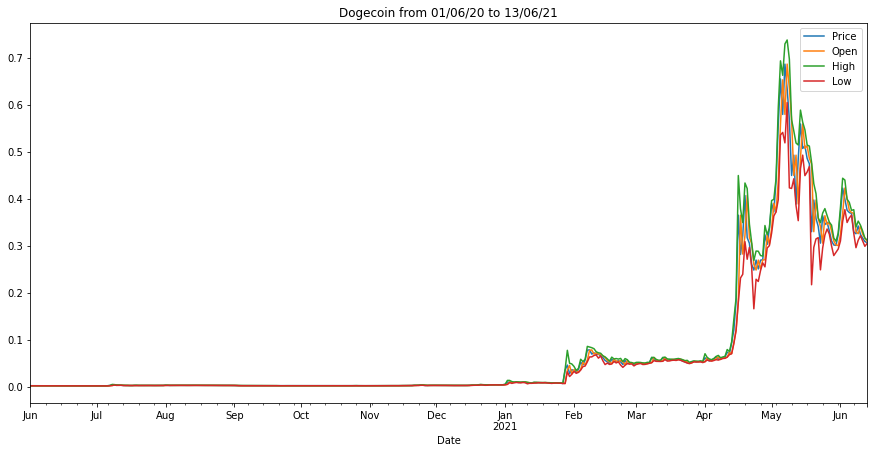

In [47]:
axd = doge_df.plot(figsize=(15,7),title = "Dogecoin from 01/06/20 to 13/06/21")
axd

# BitCoin Plot

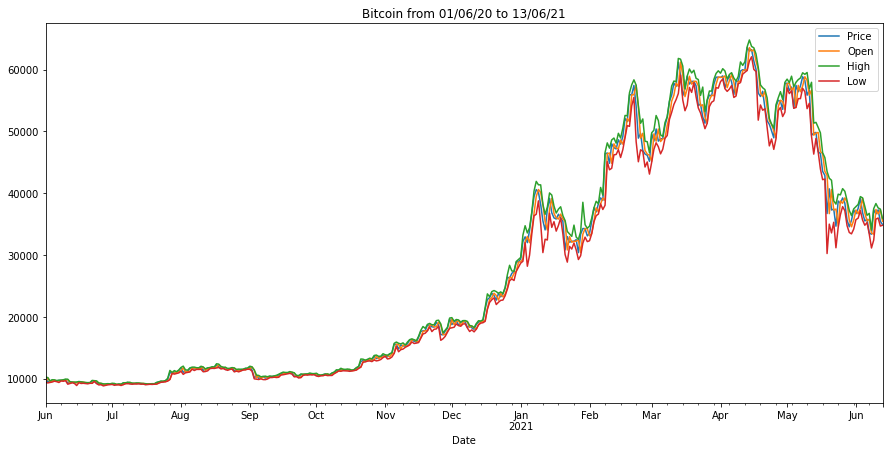

In [48]:
axb = bit_df.plot(figsize=(15,7),title = "Bitcoin from 01/06/20 to 13/06/21")
axb

# Tokens

In [14]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Load the Twitter packages
import tweepy
api_key = "QU8L989sUVlxec1PWfonD54QX"
api_secret_key = "h5vjwA6jqCQnARn1W3HrrpPBRiCO873j84IMKvGjDxGqYt5rQY"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAMZ%2FQgEAAAAAtT9CpEX8%2FNU7jE971xqHGaNrIsE%3DFYstlFu7GByL45JlPZcQfRqvVfAo6DeKBLdIw9FrPzvvlMuOWuNPl...TvpX2DSn5HtZKEn67tJI..."
access_token = "1103347220617687041-zi3nI04BUzwgXJ0etkInF3jR7kkJhW"
access_token_secret = "LGNgC51MYieLebk2xisM1Rjy5FSC70iaYu7xUmAH5V1Pc"

# Create The Authenticate Object
authenticate = tweepy.OAuthHandler(api_key, api_secret_key)

# Set The Access Token & Access Token Secret
authenticate.set_access_token(access_token, access_token_secret)

# Create The API Object
api = tweepy.API(authenticate, wait_on_rate_limit = True)

# Musk's Tweets

In [25]:
import datetime
screen_name = 'elonmusk'
count = 200
# Creation of query method using parameters

new_tweets = api.user_timeline(screen_name = screen_name,count = 200)

alltweets = []
alltweets.extend(new_tweets) 
oldest_tweet = alltweets[-1].id - 1
while len(new_tweets)>0:
  new_tweets = api.user_timeline(screen_name = screen_name,count = 200)
  alltweets.extend(new_tweets)
  oldest_tweet = alltweets[-1].id - 1


print("Pulling all",len(alltweets),"tweets")
#print(alltweets)
# # Pulling information from tweets iterable object
tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in alltweets if "dogecoin" in tweet.text.lower()]

# # Creation of dataframe from tweets list
# # Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list)
tweets_df.columns = ["Date","Id","Tweet"]
tweets_df.to_csv("ElonTweets.csv")
tweets_df

Pulling all 1237 tweets


,Date,Id,Tweet
0,2021-06-05 08:21:59,1401091921746006017,@lexfridman @VitalikButerin @ethereum @Bitcoin...
1,2021-06-04 05:27:36,1400685648001081352,@ItsDogeCoin @RTHowell Haf yu sin mi danz?
2,2021-05-30 21:24:28,1399114511202852871,@hiddin2urleft @greg16676935420 @blockfolio @B...
3,2021-05-25 20:16:51,1397285556954877953,@itsALLrisky Please note Dogecoin has no forma...
4,2021-05-25 05:37:12,1397064185222078467,@heydave7 @dogecoin_devs Doge has dogs &amp; m...
5,2021-05-24 20:29:33,1396926365996261382,Someone suggested changing Dogecoin fees based...
6,2021-05-24 19:49:56,1396916392629137409,"If you’d like to help develop Doge, please sub..."
7,2021-05-20 13:14:02,1395367211083067399,@xSharknado @DogecoinRise @TeslaGong 🤣🤣
8,2021-06-05 08:21:59,1401091921746006017,@lexfridman @VitalikButerin @ethereum @Bitcoin...
9,2021-06-04 05:27:36,1400685648001081352,@ItsDogeCoin @RTHowell Haf yu sin mi danz?


#Jack's Tweets

In [26]:
username = 'jack'
count = 200
   
# Creation of query method using parameters
tweets = tweepy.Cursor(api.user_timeline,id=username).items(count)

# Pulling information from tweets iterable object
tweets_list = [[tweet.created_at, tweet.id, tweet.text] for tweet in tweets if "bitcoin" in tweet.text.lower()]

# Creation of dataframe from tweets list
# Add or remove columns as you remove tweet information
tweets_df = pd.DataFrame(tweets_list)
tweets_df.columns = ["Date","Id","Tweet"]
tweets_df.to_csv("JackTweets.csv")
tweets_df

,Date,Id,Tweet
0,2021-06-13 20:18:39,1404171376911523840,RT @DocumentingBTC: Venezuela 🇻🇪 has the 3rd h...
1,2021-06-13 01:52:33,1403893020756426753,🌍#Bitcoin https://t.co/5RgLqdfk7k
2,2021-06-13 01:34:22,1403888443218960384,"RT @michael_saylor: On Wednesday, you are all ..."
3,2021-06-13 01:31:18,1403887669768339459,The people of Nigeria will lead #bitcoin 🇳🇬 ht...
4,2021-06-12 20:33:31,1403812730881052680,🇳🇬🤝#bitcoin
5,2021-06-12 13:05:33,1403699998060077059,RT @builtwithbtc: We're Built With Bitcoin 👋\n...
6,2021-06-12 12:44:39,1403694738511958021,RT @bitentrepreneur: TAPROOT has locked-in. Ex...
7,2021-06-11 19:55:35,1403440797610020873,"""…useless complicated math problems…""\n\n@SenW..."
8,2021-06-11 04:20:31,1403205482236493826,RT @TechCortes: Seguiremos hablando un solo le...
9,2021-06-11 04:08:15,1403202392255086592,RT @camilacampton: #Bitcoin is for everyone 🧡


> Reading the pulled tweets

* Elon Musk's for Dogecoin

* Jack Dorsey's for Bitcoin

In [44]:
dogeTweets_df = pd.read_csv("ElonTweets.csv")
bitTweets_df = pd.read_csv("JackTweets.csv")
dogeTweets_df, bitTweets_df

(    Unnamed: 0  ...                                              Tweet
 0            0  ...  @lexfridman @VitalikButerin @ethereum @Bitcoin...
 1            1  ...         @ItsDogeCoin @RTHowell Haf yu sin mi danz?
 2            2  ...  @hiddin2urleft @greg16676935420 @blockfolio @B...
 3            3  ...  @itsALLrisky Please note Dogecoin has no forma...
 4            4  ...  @heydave7 @dogecoin_devs Doge has dogs &amp; m...
 5            5  ...  Someone suggested changing Dogecoin fees based...
 6            6  ...  If you’d like to help develop Doge, please sub...
 7            7  ...            @xSharknado @DogecoinRise @TeslaGong 🤣🤣
 8            8  ...  @lexfridman @VitalikButerin @ethereum @Bitcoin...
 9            9  ...         @ItsDogeCoin @RTHowell Haf yu sin mi danz?
 10          10  ...  @hiddin2urleft @greg16676935420 @blockfolio @B...
 11          11  ...  @itsALLrisky Please note Dogecoin has no forma...
 12          12  ...  @heydave7 @dogecoin_devs Doge has dogs &am

In [51]:
dogeDates=[]
for i in dogeTweets_df["Date"]:
  date = i.split()[0]  # splitting because we don't want time
  #print(date)
  dogeDates.append(date)

In [52]:
bitDates=[]
for i in bitTweets_df["Date"]:
  date = i.split()[0]
  #print(date)
  bitDates.append(date)

In [53]:
dogeTweets = doge_df[doge_df.index.isin(dogeDates)]
dogeTweets.head()

,Price,Open,High,Low
Date,,,,
2021-06-05,0.371083,0.375948,0.392679,0.359655
2021-06-04,0.375950,0.399356,0.399609,0.349920
2021-05-30,0.301199,0.302124,0.310034,0.286698
2021-05-25,0.345477,0.364394,0.379504,0.323238
2021-05-24,0.364433,0.305975,0.369911,0.295792


In [55]:
bitTweets = bit_df[bit_df.index.isin(bitDates)]
bitTweets.head()

,Price,Open,High,Low
Date,,,,
2021-06-13,34931.4,35467.5,35903.9,34827.0
2021-06-12,35467.5,37334.4,37437.3,34703.3
2021-06-11,37314.6,36654.3,37641.1,36003.3
2021-06-09,37332.2,33385.5,37517.6,32428.6
2021-06-05,35520.0,36841.2,37887.6,34832.0


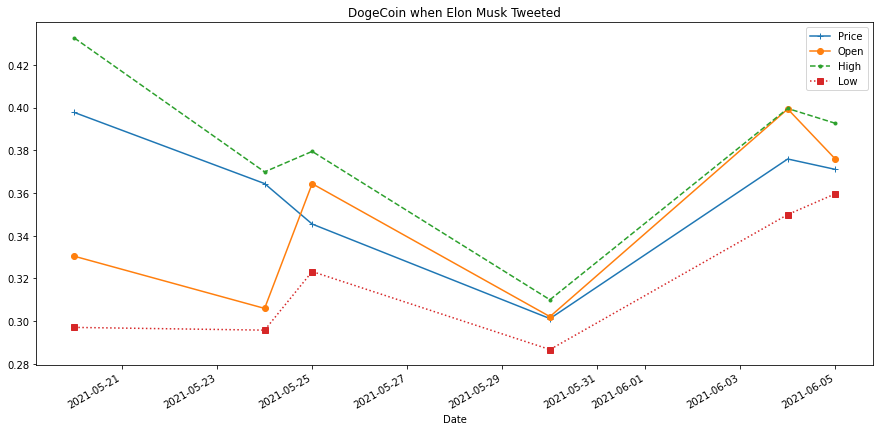

In [59]:
dogeTweets.plot(style=['+-','o-','.--','s:',".-"],figsize=(15,7),title="DogeCoin when Elon Musk Tweeted")

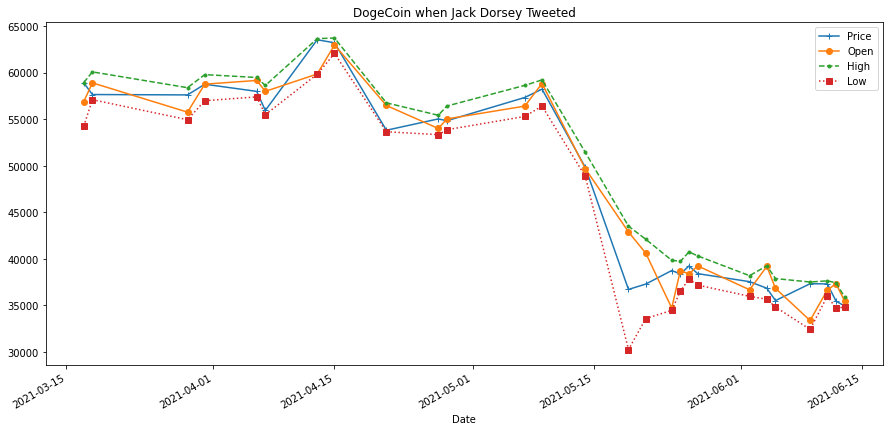

In [62]:
bitTweets.plot(style=['+-','o-','.--','s:',".-"],figsize=(15,7),title="DogeCoin when Jack Dorsey Tweeted")

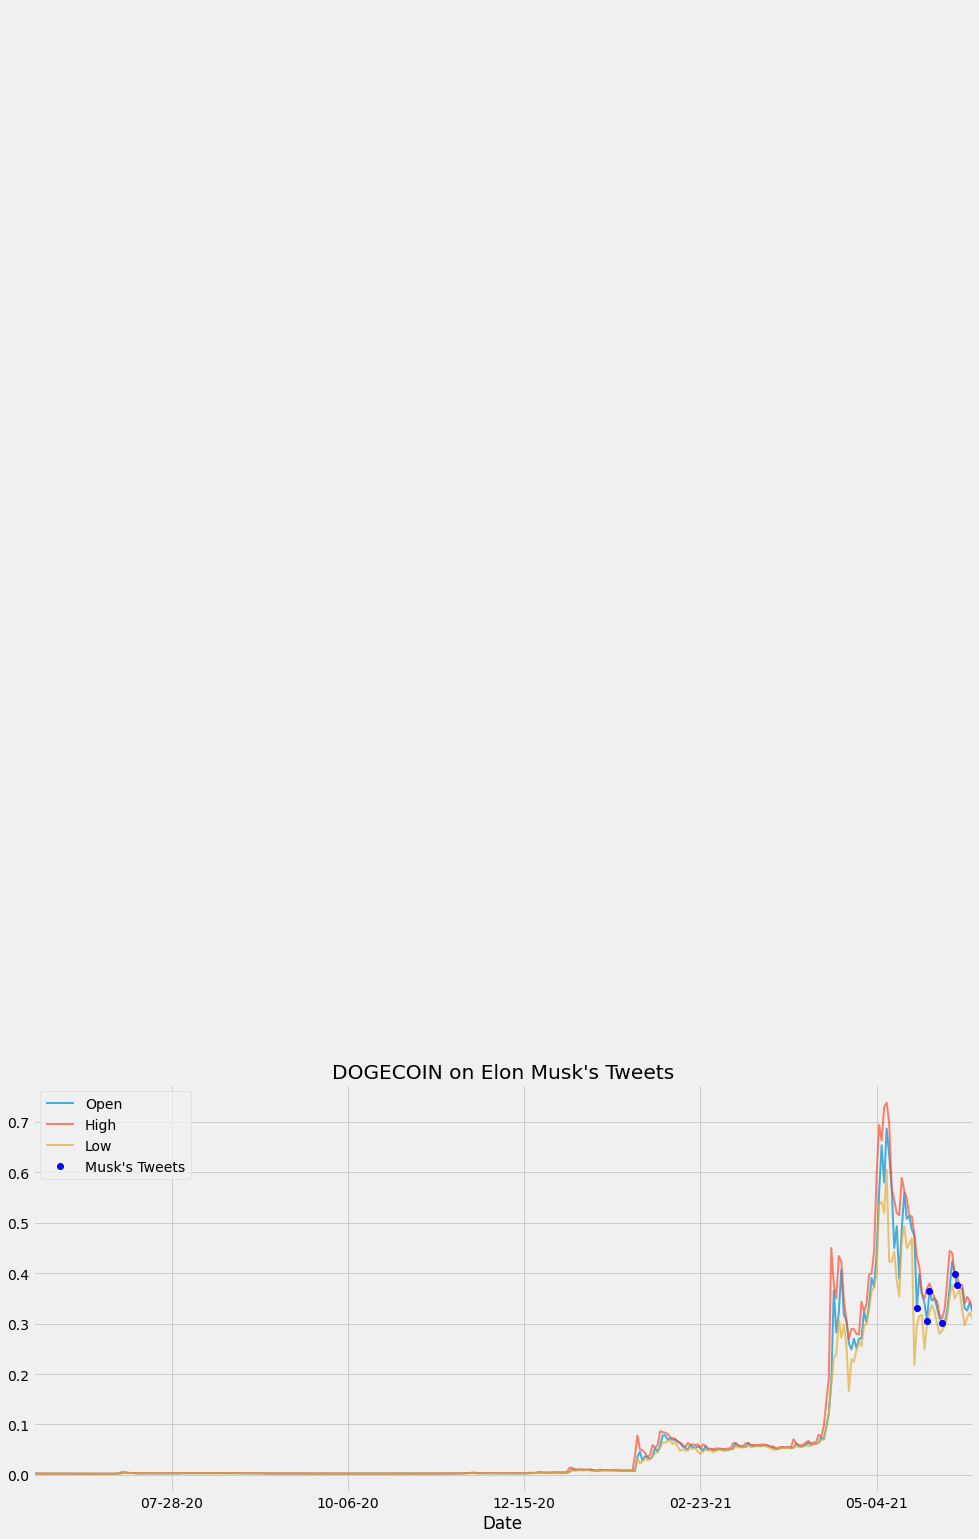

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(doge_df.index, doge_df["Open"],linewidth = 2, alpha = .7, label='Open')
ax.legend(loc="upper left") 
ax.plot(doge_df.index, doge_df["High"],linewidth = 2, alpha = .7, label='High') 
ax.legend(loc="upper left")       
ax.plot(doge_df.index, doge_df["Low"],linewidth = 2, alpha = .7, label='Low')
ax.legend(loc="upper left")        
# ax.plot(df.index, df["Close"],linewidth = 2, alpha = .7, label='Close')
# ax.legend(loc="upper left") 
# ax.plot(df.index, df["Adj Close"],linewidth = 2, alpha = .7, label='Adj Close')   
# ax.legend(loc="upper left")     

ax.plot(dogeTweets.index, dogeTweets["Open"],"bo", label="Musk's Tweets")
ax.legend(loc="upper left") 
ax.set(xlabel="Date",
       title="DOGECOIN on Elon Musk's Tweets")
# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))


ax.annotate('Elon Musk Tweeted',xy=(mdates.date2num(dogeTweets.index[0]),2.712202),xytext=(-150, 90), 
            textcoords='offset points', arrowprops=dict(arrowstyle='fancy',facecolor="black"))
ax.xaxis.zoom(0.5)
plt.show()

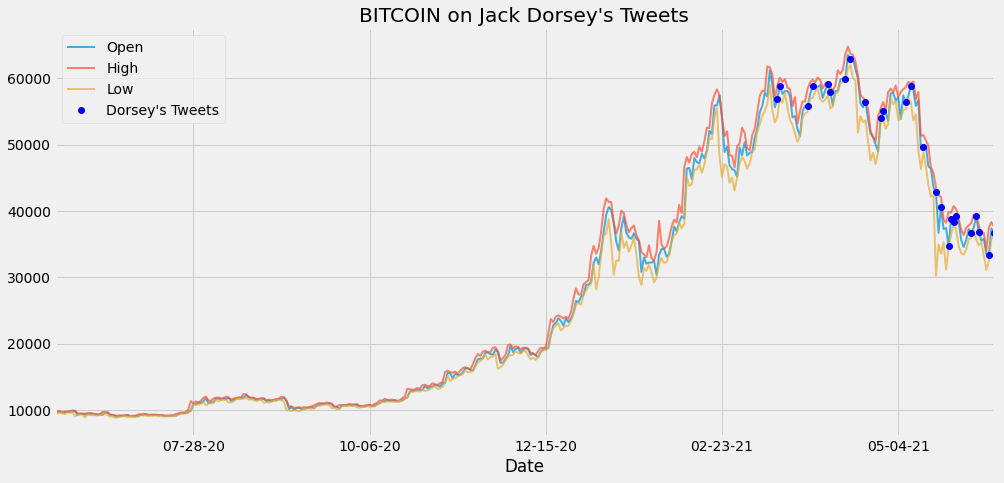

In [69]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(bit_df.index, bit_df["Open"],linewidth = 2, alpha = .7, label='Open')
ax.legend(loc="upper left") 
ax.plot(bit_df.index, bit_df["High"],linewidth = 2, alpha = .7, label='High') 
ax.legend(loc="upper left")       
ax.plot(bit_df.index, bit_df["Low"],linewidth = 2, alpha = .7, label='Low')
ax.legend(loc="upper left")        
# ax.plot(df.index, df["Close"],linewidth = 2, alpha = .7, label='Close')
# ax.legend(loc="upper left") 
# ax.plot(df.index, df["Adj Close"],linewidth = 2, alpha = .7, label='Adj Close')   
# ax.legend(loc="upper left")     

ax.plot(bitTweets.index, bitTweets["Open"],"bo", label="Dorsey's Tweets")
ax.legend(loc="upper left") 
ax.set(xlabel="Date",
       title="BITCOIN on Jack Dorsey's Tweets")
# Format the x axis
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%d-%y"))


ax.annotate('Jack Dorsey Tweeted',xy=(mdates.date2num(bitTweets.index[0]),2.712202),xytext=(-150, 90), 
            textcoords='offset points', arrowprops=dict(arrowstyle='fancy',facecolor="black"))
ax.xaxis.zoom(0.5)
plt.show()